In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def data (x, m):
    
    df = []
    for i in x:
        z = []
        for j in range (m):
            z.append (i**j)
        df.append (z)
        
    df = pd.DataFrame (df)
    return df

In [3]:
def find_weights (X, Y):
    
    rhs = np.matmul (X.T, Y)
    lhs = np.matmul (X.T, X)
    
    return np.matmul (np.linalg.inv (lhs), rhs)

In [73]:
def linear_regression (x, y, m):
    
    df = data (x, m)
    w = find_weights (df.values, y)
    
    plt.scatter (x, y, color = "red")
    val = np.linspace (0, 2*np.pi, 2)
    
    plt.xlim(0, 2*np.pi)
    plt.ylim(1.5, -1.5);
    plt.plot(val, np.matmul (data (val, m).values, w), linestyle='solid', color = "grey")
    
    return w

In [74]:
x = np.linspace (0, 2*np.pi, 15)
y = np.sin (x)

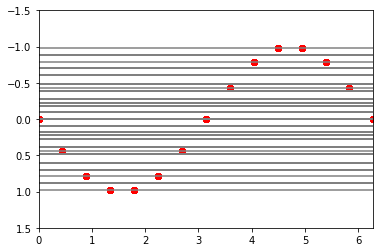

In [75]:
for i in range (len (x)):
    for j in range (i+1, len (x)):
        
        x_t = [x [i], x [j]]
        y_t = [y [i], y [j]]
        w = linear_regression (x_t, y_t, 1)

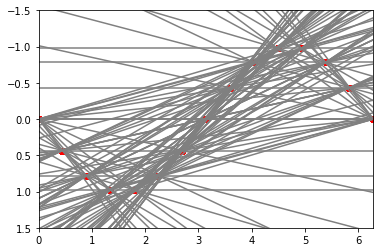

In [76]:
for i in range (len (x)):
    for j in range (i+1, len (x)):
        
        x_t = [x [i], x [j]]
        y_t = [y [i], y [j]]
        w = linear_regression (x_t, y_t, 2)